# UNSUPERWISED LEARNING

* Hopkins Test
* K-Means Clustering
    * Silhouette Analysis
    * Elbow Method
* Hierarchical Clustering
    * Dendrogram


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("penguins.csv", index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


In [4]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.00,342.00,342.00,342.00,344.00
mean,43.92,17.15,200.92,4201.75,2008.03
std,5.46,1.97,14.06,801.95,0.82
min,32.10,13.10,172.00,2700.00,2007.00
25%,39.23,15.60,190.00,3550.00,2007.00
50%,44.45,17.30,197.00,4050.00,2008.00
75%,48.50,18.70,213.00,4750.00,2009.00
max,59.60,21.50,231.00,6300.00,2009.00


In [5]:
data.shape

(344, 8)

In [6]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [7]:
data.drop('year', axis=1, inplace=True)  ## delete the year column.

In [8]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male
2,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female
3,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
5,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female


In [9]:
data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
340,Chinstrap,Dream,55.80,19.80,207.00,4000.00,male
341,Chinstrap,Dream,43.50,18.10,202.00,3400.00,female
342,Chinstrap,Dream,49.60,18.20,193.00,3775.00,male
343,Chinstrap,Dream,50.80,19.00,210.00,4100.00,male
344,Chinstrap,Dream,50.20,18.70,198.00,3775.00,female


In [10]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [11]:
data["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [12]:
data["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [13]:
data[data["sex"].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
9,Adelie,Torgersen,34.10,18.10,193.00,3475.00,NaN
10,Adelie,Torgersen,42.00,20.20,190.00,4250.00,NaN
11,Adelie,Torgersen,37.80,17.10,186.00,3300.00,NaN
12,Adelie,Torgersen,37.80,17.30,180.00,3700.00,NaN
48,Adelie,Dream,37.50,18.90,179.00,2975.00,NaN
179,Gentoo,Biscoe,44.50,14.30,216.00,4100.00,NaN
219,Gentoo,Biscoe,46.20,14.40,214.00,4650.00,NaN
257,Gentoo,Biscoe,47.30,13.80,216.00,4725.00,NaN
269,Gentoo,Biscoe,44.50,15.70,217.00,4875.00,NaN


In [15]:
data.drop(index= [4, 272], inplace= True) # drop records inplace
data.reset_index(inplace= True, drop = True)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female
3,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female
4,Adelie,Torgersen,38.90,17.80,181.00,3625.00,female


In [16]:
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

# EDA

In [17]:
def bar_plot(variable):
    # get feature
    var = data[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    # visualize
    plt.figure(figsize= (9, 3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}".format(variable, varValue))

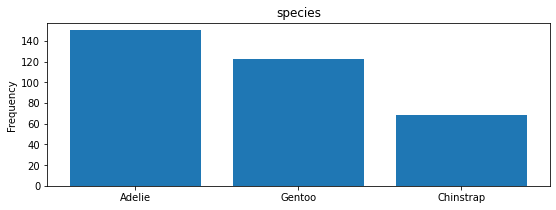

species: 
Adelie       150
Gentoo       122
Chinstrap     68
Name: species, dtype: int64


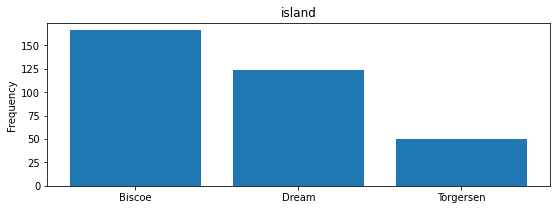

island: 
Biscoe       166
Dream        124
Torgersen     50
Name: island, dtype: int64


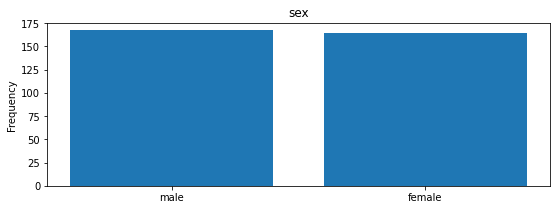

sex: 
male      167
female    164
Name: sex, dtype: int64


In [18]:
category1 = ["species","island","sex"]    ## bar_plots for categorical variables
for c in category1:
    bar_plot(c)

In [19]:
def plot_hist(variable):                             ##histograms for the numeric variables.
    plt.hist(data[variable], bins = 30)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

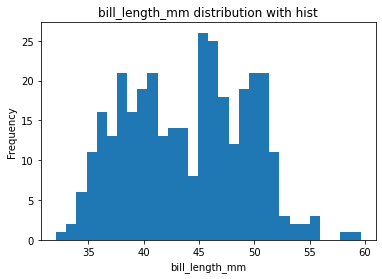

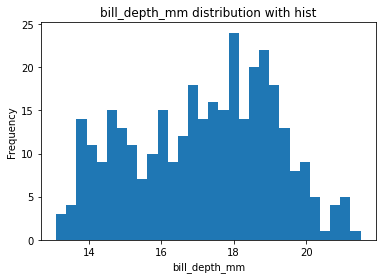

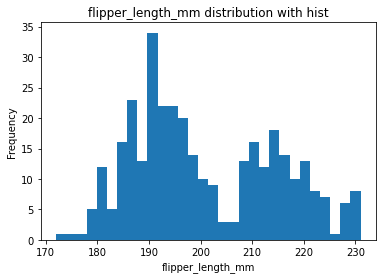

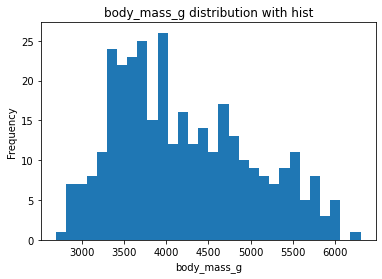

In [20]:
numericVar = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm","body_mass_g"]
for n in numericVar:
    plot_hist(n)

In [21]:
corr=data.corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.23,0.66,0.59
bill_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


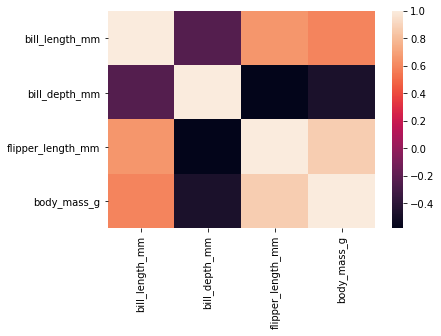

In [22]:
sns.heatmap(corr)
plt.show()

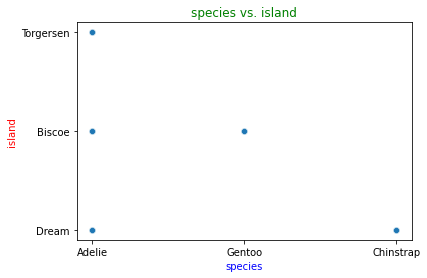

In [23]:
sns.scatterplot(x='species', y='island', data=data)
plt.xlabel("species", c='b')
plt.ylabel("island", c= 'r')
plt.title('species vs. island', c='g')
plt.show()

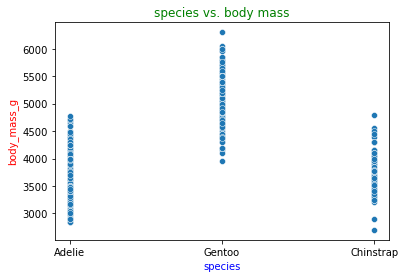

In [24]:
sns.scatterplot(x='species', y='body_mass_g', data=data)
plt.xlabel("species", c='b')
plt.ylabel("body_mass_g", c= 'r')
plt.title('species vs. body mass', c='g')
plt.show()

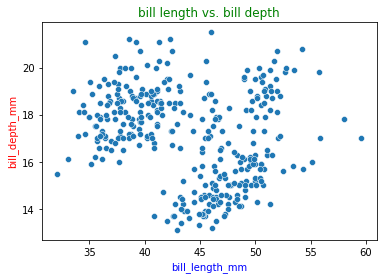

In [25]:
sns.scatterplot(x="bill_length_mm", y= "bill_depth_mm", data=data)
plt.xlabel("bill_length_mm", c='b')
plt.ylabel("bill_depth_mm", c= 'r')
plt.title('bill length vs. bill depth', c='g')
plt.show()

Detecting Outliers

In [26]:
def detect_outliers(data, features):
    outlier_indices = []
    for c in features:
        # 1st quartile Q1
        Q1 = np.percentile(data[c], 25)
        # Q1 = df[c].quantile(0.25)
        # 3st quartile Q3
        Q3 = np.percentile(data[c], 75)
        # Q3 = df[c].quantile(0.75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [27]:
data.loc[detect_outliers(data, ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','body_mass_g'])]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


As can be seen, there is no outliers in the data

## Missing Values in Sex Column

In [28]:
data2 = data.copy()

In [29]:
data2["Sex"] = [0 if i == "male" else 1 for i in data2.sex]
data2.drop(columns= ["species", "island", "sex"], inplace= True)
data_array_imp = np.array(data2)

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [31]:
array_norm = sc.fit_transform(data_array_imp)
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 4)
data_array_imp = imputer.fit_transform(array_norm)

In [32]:
data_imputed = pd.DataFrame(data_array_imp, columns= ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex'])

In [33]:
data["sex"] = data_imputed["sex"].astype(int)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,0
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,1
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,1
3,Adelie,Torgersen,36.70,19.30,193.00,3450.00,1
4,Adelie,Torgersen,38.90,17.80,181.00,3625.00,1


In [34]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [35]:
island_map = {"Biscoe": 0,
               "Dream": 1,
             "Torgersen":2}
island_map

{'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}

In [36]:
data["Island"] = data["island"].map(island_map)
data.drop('island', axis=1, inplace= True)

In [37]:
data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Island
0,Adelie,39.10,18.70,181.00,3750.00,0,2
1,Adelie,39.50,17.40,186.00,3800.00,1,2
2,Adelie,40.30,18.00,195.00,3250.00,1,2
3,Adelie,36.70,19.30,193.00,3450.00,1,2
4,Adelie,38.90,17.80,181.00,3625.00,1,2


# Modelling

Since we are doing an unsupervised model, we are dropping the species column.

## Hopkins Test

In [38]:
data_copy= data.copy()

In [39]:
data.drop('species', axis=1, inplace=True)

In [40]:
X = data

In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [42]:
from pyclustertend import hopkins
hopkins(X,X.shape[0])

0.18391291332084422

According to the hopkins test, our data is appropriate for clustering 

# K-Means Clustering

In [43]:
from sklearn.cluster import KMeans

## Silhouette Analysis

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
range_n_clusters = range(2, 9)
for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters= num_clusters, random_state= 42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"for n_clusters = {num_clusters}, the silhouette score is {silhouette_avg}")

for n_clusters = 2, the silhouette score is 0.46215790201730106
for n_clusters = 3, the silhouette score is 0.3877740975040713
for n_clusters = 4, the silhouette score is 0.39692401614193934
for n_clusters = 5, the silhouette score is 0.4109115139399629
for n_clusters = 6, the silhouette score is 0.42565947026248424
for n_clusters = 7, the silhouette score is 0.4452588246353639
for n_clusters = 8, the silhouette score is 0.4667403710450512


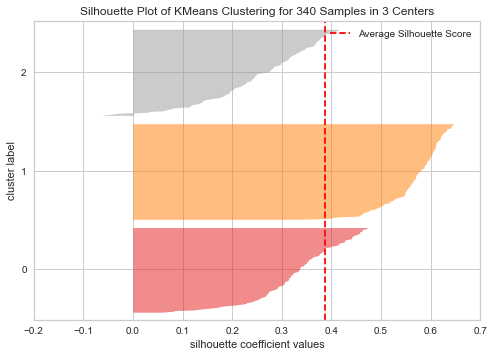

In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(3, random_state= 42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)
visualizer.poof();

## Elbow Method

In [47]:
ssd = []
K = range(2, 10)
for k in K:
    model3 = KMeans(n_clusters= k)
    model3.fit(X)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

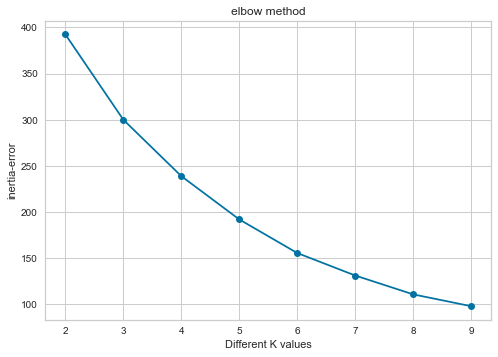

In [48]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different K values")
plt.ylabel("inertia-error")
plt.title("elbow method")

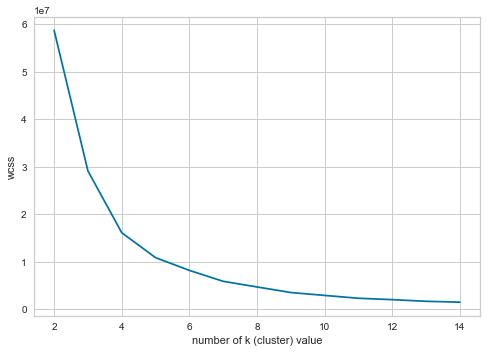

In [49]:
wcss = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

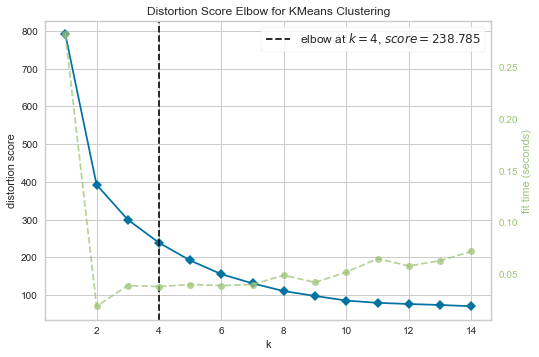

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state= 42)
visualizer = KElbowVisualizer(model,k= (1,15))
visualizer.fit(X)
visualizer.show()

In [51]:
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Island
0,39.10,18.70,181.00,3750.00,0,2
1,39.50,17.40,186.00,3800.00,1,2
2,40.30,18.00,195.00,3250.00,1,2
3,36.70,19.30,193.00,3450.00,1,2
4,38.90,17.80,181.00,3625.00,1,2
...,...,...,...,...,...,...
335,55.80,19.80,207.00,4000.00,0,1
336,43.50,18.10,202.00,3400.00,1,1
337,49.60,18.20,193.00,3775.00,0,1
338,50.80,19.00,210.00,4100.00,0,1


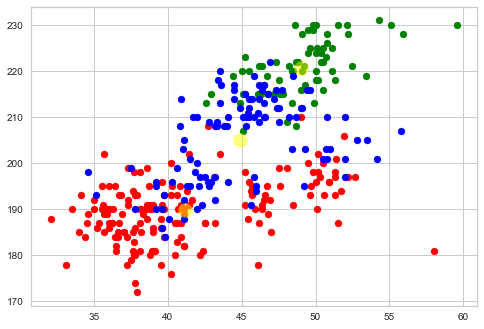

In [52]:
kmeans = KMeans(n_clusters= 3)
clusters = kmeans.fit_predict(data)
data["label"] = clusters
plt.scatter(data.iloc[:,0][data.label == 0], data.iloc[:,2][data.label == 0], color = "red")
plt.scatter(data.iloc[:,0][data.label == 1], data.iloc[:,2][data.label == 1], color = "green")
plt.scatter(data.iloc[:,0][data.label == 2], data.iloc[:,2][data.label == 2], color = "blue")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], color= "yellow", s= 200, alpha= 0.5)
plt.show()


In [53]:
centers = kmeans.cluster_centers_
centers

array([[4.11890244e+01, 1.80170732e+01, 1.89951220e+02, 3.51737805e+03,
        6.76829268e-01, 1.01219512e+00],
       [4.89898551e+01, 1.55420290e+01, 2.20739130e+02, 5.43876812e+03,
        1.44927536e-01, 1.11022302e-16],
       [4.48738318e+01, 1.68514019e+01, 2.04934579e+02, 4.44883178e+03,
        4.85981308e-01, 5.42056075e-01]])

# Hierarchical Clustering


In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram

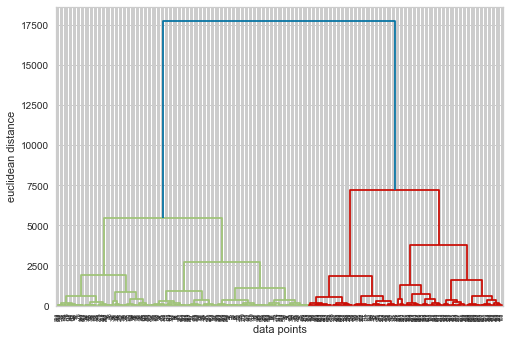

In [55]:
merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation= 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

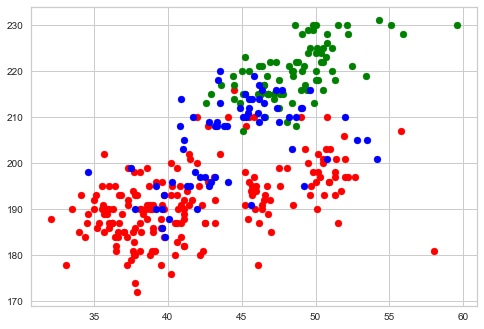

In [56]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity= "euclidean", linkage= "ward")
cluster = hierarchical_cluster.fit_predict(data)

data["label"] = cluster

plt.scatter(data.iloc[:,0][data.label == 0], data.iloc[:,2][data.label == 0], color = "red")
plt.scatter(data.iloc[:,0][data.label == 1], data.iloc[:,2][data.label == 1], color = "green")
plt.scatter(data.iloc[:,0][data.label == 2], data.iloc[:,2][data.label == 2], color = "blue")
plt.show()

In [57]:
data.drop('label',axis=1, inplace=True)

# Evaluating the model

In [58]:
data["predicted_clusters"] = cluster

In [59]:
species_map = {"Chinstrap": 0,
               "Gentoo": 1,
               "Adelie":2}
data_copy["Species"] = data_copy["species"].map(species_map)


In [60]:
data['species']= data_copy.Species

In [61]:
data.sample(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Island,predicted_clusters,species
104,38.60,17.20,199.00,3750.00,1,0,0,2
125,41.50,18.30,195.00,4300.00,0,2,2,2
212,45.70,13.90,214.00,4400.00,1,0,2,1
49,40.10,18.90,188.00,4300.00,0,0,2,2
333,46.80,16.50,189.00,3650.00,1,1,0,0
88,35.70,18.00,202.00,3550.00,1,1,0,2
288,50.30,20.00,197.00,3300.00,0,1,0,0
179,50.00,15.30,220.00,5550.00,0,0,1,1
8,37.80,17.10,186.00,3300.00,1,2,0,2
80,36.70,18.80,187.00,3800.00,1,2,0,2


In [62]:
ct = pd.crosstab(data.predicted_clusters, data.species)
ct

species,0,1,2
predicted_clusters,,,
0,61,6,125
1,0,80,0
2,7,36,25


In [63]:
df_end = data

In [64]:
from sklearn.metrics import adjusted_rand_score

In [65]:
adjusted_rand_score(df_end.species, df_end.predicted_clusters)

0.3728385039700761

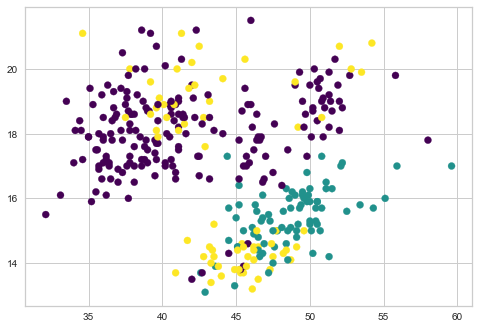

In [66]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = data.predicted_clusters, cmap = "viridis")

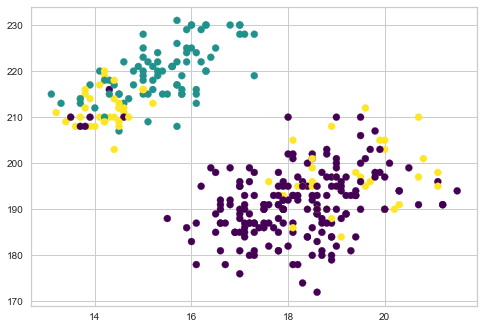

In [67]:
plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c = data.predicted_clusters, cmap= "viridis")

# Supervised Method- SVM

In [68]:
df= data.drop('species', axis=1)

In [69]:
X = df.drop("predicted_clusters", axis= 1)
y = df["predicted_clusters"]

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state= 101)

In [74]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (238, 6)
X_test : (102, 6)
y_train : (238,)
y_test : (102,)


In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'C':[1, 10, 20, 30,50, 70, 100, 1000],
             'kernel':['linear','rbf','poly','sigmoid'],
            'gamma': [1e-3, 1e-4]}

In [77]:
from sklearn.svm import SVC

In [78]:
svc_model = SVC()

In [79]:
svc_grid_model = GridSearchCV(estimator=svc_model, param_grid=param_grid, verbose = 3, cv=5)

In [80]:
svc_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 70, 100, 1000],
                         'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [81]:
y_pred = svc_grid_model.predict(X_test)
y_train_pred = svc_grid_model.predict(X_train)


In [82]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,confusion_matrix, classification_report

In [83]:
svc_scores = {"svc_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred,average = "weighted"),
    "recall_score" : recall_score(y_train, y_train_pred,average = "weighted"),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted"),}, 

    "svc_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred,average = "weighted"),
    "recall_score" : recall_score(y_test, y_pred, average = "weighted"),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")
   }}
svc =pd.DataFrame(svc_scores)

In [84]:
svc

,svc_train,svc_test
accuracy,1.00,0.99
precision_score,1.00,0.99
recall_score,1.00,0.99
f1_score,1.00,0.99


# Supervised Method- RandomForest

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [88]:
param_grid ={
    'n_estimators': [5,10,30, 50, 100],
    'criterion':['gini','entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}
model= RandomForestClassifier()

rf_grid_model = GridSearchCV(model, param_grid, verbose = 2, cv=10, refit= True)

rf_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END ..criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 30, 50, 100]},
             verbose=2)

In [89]:
y_pred = rf_grid_model.predict(X_test)
y_train_pred = rf_grid_model.predict(X_train)

In [90]:
rf_grid_scores = {"rf_grid_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred,average = "weighted"),
    "recall_score" : recall_score(y_train, y_train_pred,average = "weighted"),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted"),}, 

    "rf_grid_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred,average = "weighted"),
    "recall_score" : recall_score(y_test, y_pred, average = "weighted"),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")
   }}
rf_grid =pd.DataFrame(rf_grid_scores)

In [91]:
rf_grid

,rf_grid_train,rf_grid_test
accuracy,1.00,1.00
precision_score,1.00,1.00
recall_score,1.00,1.00
f1_score,1.00,1.00


In [92]:
pd.concat([svc, rf_grid],axis=1)

,svc_train,svc_test,rf_grid_train,rf_grid_test
accuracy,1.00,0.99,1.00,1.00
precision_score,1.00,0.99,1.00,1.00
recall_score,1.00,0.99,1.00,1.00
f1_score,1.00,0.99,1.00,1.00
